### This is an edited version of Shelby's EDA, I didn't want to edit his but I wanted to analyze aspects of the data that he had already created.

In [1]:
import pandas
import seaborn
from pathlib import Path
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
from pandas.core.reshape.merge import merge
xtrain = read_csv(Path('data/Xtrain.csv'))
ytrain = read_csv(Path('data/Ytrain.csv'))
xtest = read_csv(Path('data/Xtest.csv'))
ytrain = ytrain.loc[:, ~ytrain.columns.str.contains('^Unnamed')]
dataset = xtrain.merge(ytrain, left_index= True, right_index= True)

In [3]:
dataset = dataset.dropna(how = 'any')
Xtrain_date = dataset.copy()
Xtrain_date['date'] = pandas.to_datetime(Xtrain_date['date'], format='%Y/%m/%d')
day = Xtrain_date['date'].dt.day
weekday = Xtrain_date['date'].dt.weekday
month = Xtrain_date['date'].dt.month
Xtrain_date.insert(1,'day',day)
Xtrain_date.insert(1,'weekday',weekday)
Xtrain_date.insert(2,'month',month)
dataset = Xtrain_date

In [4]:
Xtrain_date = dataset.copy()
hour = pandas.to_datetime(Xtrain_date['hour'], format='%H:%M:%S').dt.hour
Xtrain_date.insert(1,'intHour',hour)
dataset = Xtrain_date

# Adding Lines to the Dataset

In [5]:
line = []

for i in dataset["train"]:
    if i <= 11:
        line.append(0)
    elif i <= 21:
        line.append(1)
    elif i <= 27:
        line.append(2)
    elif i == 28:
        line.append(3)
    elif i <= 33:
        line.append(4)
    elif i <= 44:
        line.append(5)
    elif i <= 50:
        line.append(6)
    else:
        line.append(7)
        
Xtrain_date.insert(1,'line',line)

# Correlation

### Same Train at Previous Stations

Text(0.5, 1.0, 'p0q1')

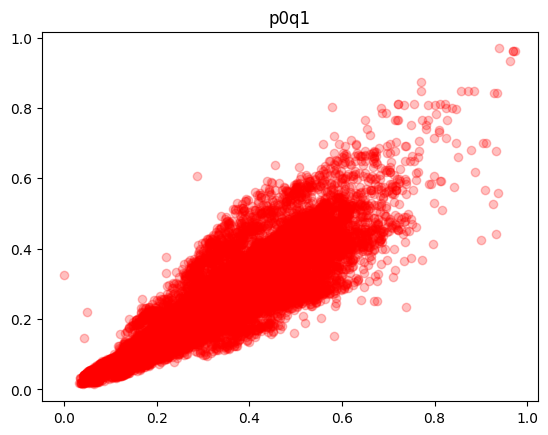

In [6]:
pyplot.scatter(dataset["p0q0"], dataset["p0q1"], c="r", alpha=0.25)
pyplot.title("p0q1")

Text(0.5, 1.0, 'p0q2')

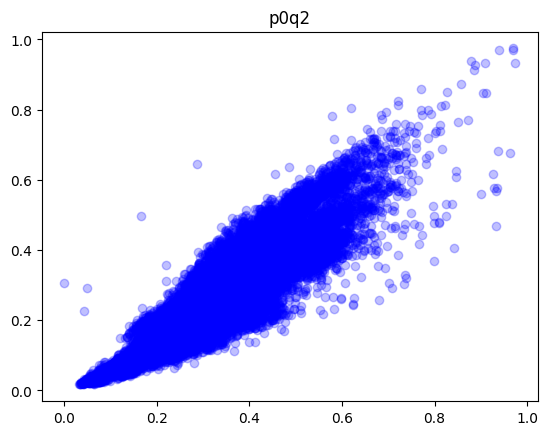

In [7]:
pyplot.scatter(dataset["p0q0"], dataset["p0q2"], c="b", alpha=0.25)
pyplot.title("p0q2")

Text(0.5, 1.0, 'p0q3')

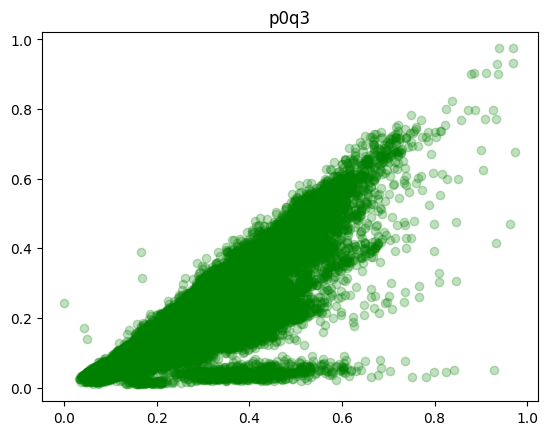

In [8]:
pyplot.scatter(dataset["p0q0"], dataset["p0q3"], c="g", alpha=0.25)
pyplot.title("p0q3")

Text(0.5, 1.0, 'All q Variables')

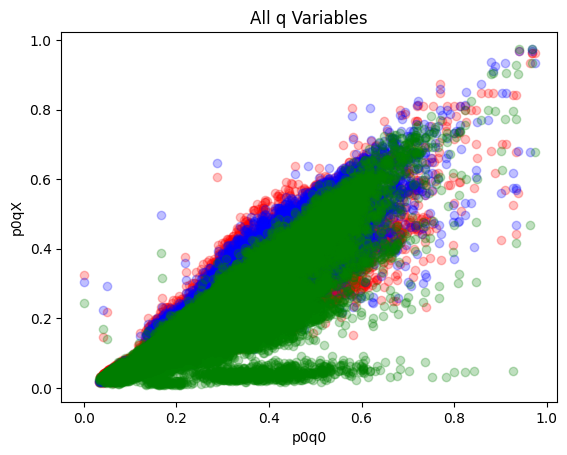

In [9]:
pyplot.scatter(dataset["p0q0"], dataset["p0q1"], c="r", alpha=0.25)
pyplot.scatter(dataset["p0q0"], dataset["p0q2"], c="b", alpha=0.25)
pyplot.scatter(dataset["p0q0"], dataset["p0q3"], c="g", alpha=0.25)
pyplot.xlabel('p0q0') 
pyplot.ylabel('p0qX') 
pyplot.title("All q Variables")

### Previous Trains at Same Station

Text(0.5, 1.0, 'p1q0')

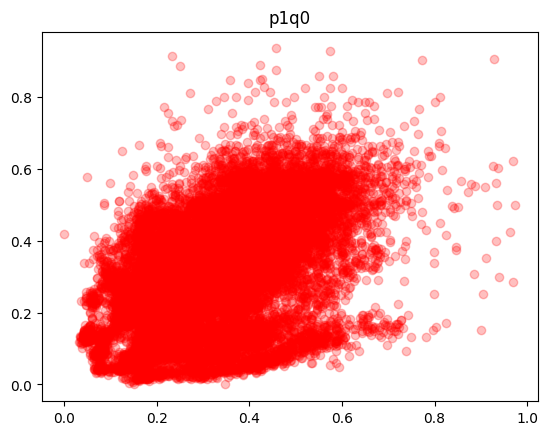

In [10]:
pyplot.scatter(dataset["p0q0"], dataset["p1q0"], c="r", alpha=0.25)
pyplot.title("p1q0")

Text(0.5, 1.0, 'p2q0')

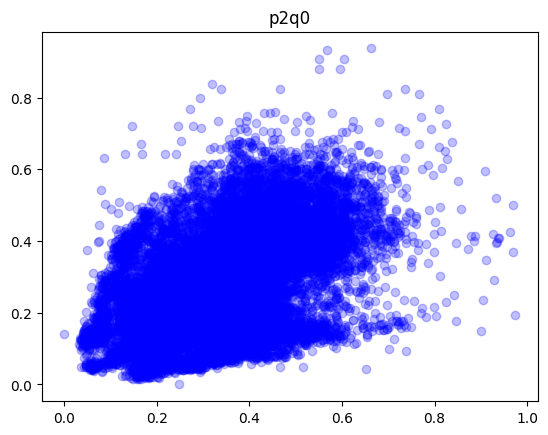

In [11]:
pyplot.scatter(dataset["p0q0"], dataset["p2q0"], c="b", alpha=0.25)
pyplot.title("p2q0")

Text(0.5, 1.0, 'p3q0')

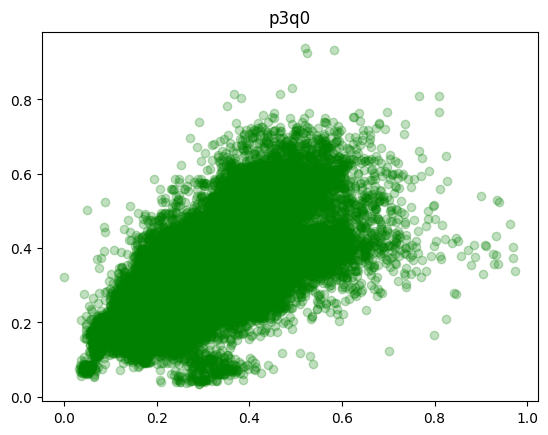

In [12]:
pyplot.scatter(dataset["p0q0"], dataset["p3q0"], c="g", alpha=0.25)
pyplot.title("p3q0")

Text(0.5, 1.0, 'All p Variables')

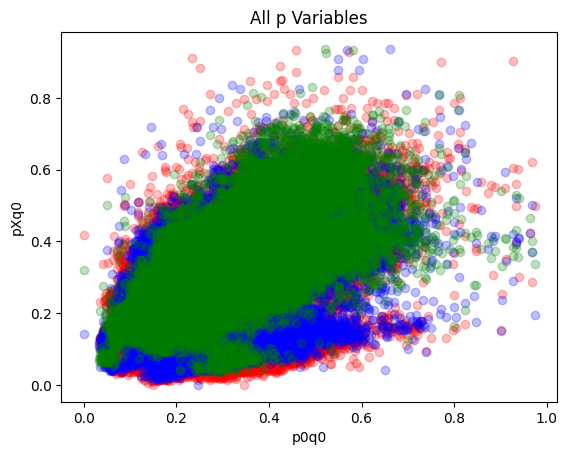

In [13]:
pyplot.scatter(dataset["p0q0"], dataset["p1q0"], c="r", alpha=0.25)
pyplot.scatter(dataset["p0q0"], dataset["p2q0"], c="b", alpha=0.25)
pyplot.scatter(dataset["p0q0"], dataset["p3q0"], c="g", alpha=0.25)
pyplot.xlabel('p0q0') 
pyplot.ylabel('pXq0') 
pyplot.title("All p Variables")

### Relation Between pX and qX Variables

Text(0.5, 1.0, 'p0q1 to p1q0')

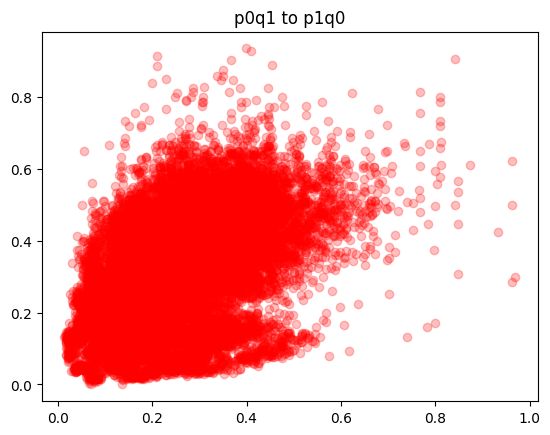

In [14]:
pyplot.scatter(dataset["p0q1"], dataset["p1q0"], c="r", alpha=0.25)
pyplot.title("p0q1 to p1q0")

Text(0.5, 1.0, 'p0q2 to p2q0')

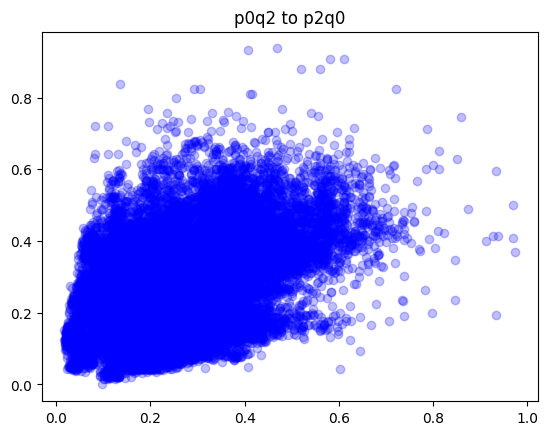

In [15]:
pyplot.scatter(dataset["p0q2"], dataset["p2q0"], c="b", alpha=0.25)
pyplot.title("p0q2 to p2q0")

Text(0.5, 1.0, 'p0q3 to p3q0')

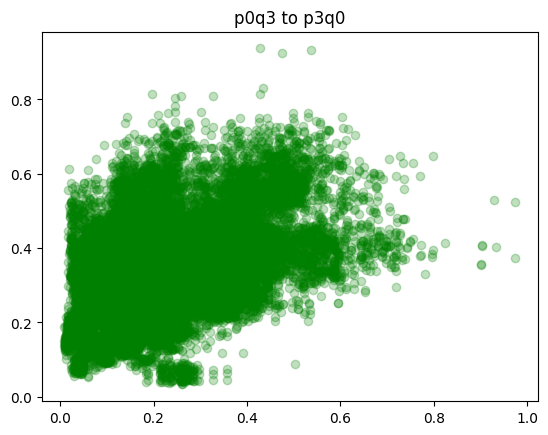

In [16]:
pyplot.scatter(dataset["p0q3"], dataset["p3q0"], c="g", alpha=0.25)
pyplot.title("p0q3 to p3q0")

Text(0.5, 1.0, 'p0qX to pXq0')

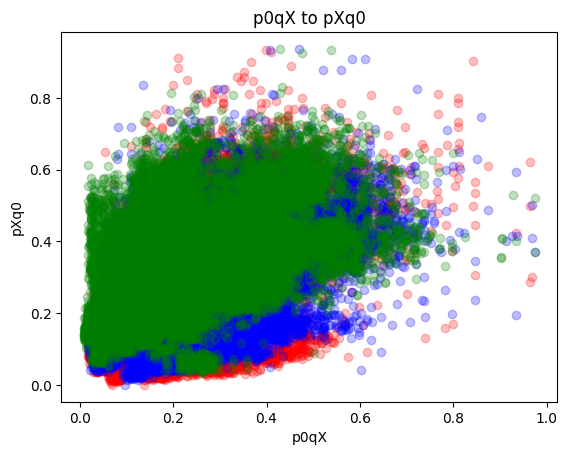

In [17]:
pyplot.scatter(dataset["p0q1"], dataset["p1q0"], c="r", alpha=0.25)
pyplot.scatter(dataset["p0q2"], dataset["p2q0"], c="b", alpha=0.25)
pyplot.scatter(dataset["p0q3"], dataset["p3q0"], c="g", alpha=0.25)
pyplot.xlabel('p0qX') 
pyplot.ylabel('pXq0') 
pyplot.title("p0qX to pXq0")

### Relation Between p0qX and pYq0

Text(0.5, 1.0, 'p0q1 to p')

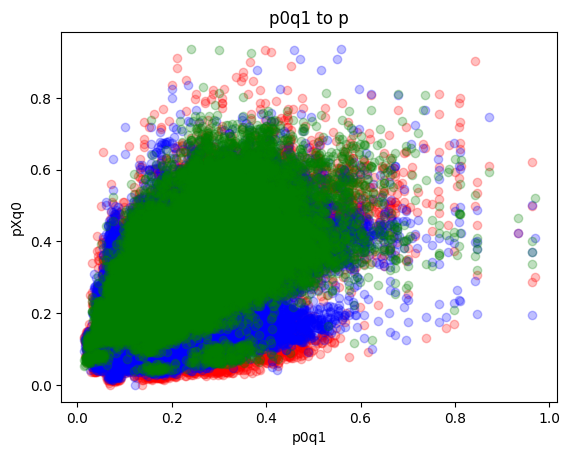

In [18]:
pyplot.scatter(dataset["p0q1"], dataset["p1q0"], c="r", alpha=0.25)
pyplot.scatter(dataset["p0q1"], dataset["p2q0"], c="b", alpha=0.25)
pyplot.scatter(dataset["p0q1"], dataset["p3q0"], c="g", alpha=0.25)
pyplot.xlabel('p0q1') 
pyplot.ylabel('pXq0') 
pyplot.title("p0q1 to p")

Text(0.5, 1.0, 'p0q2 to p')

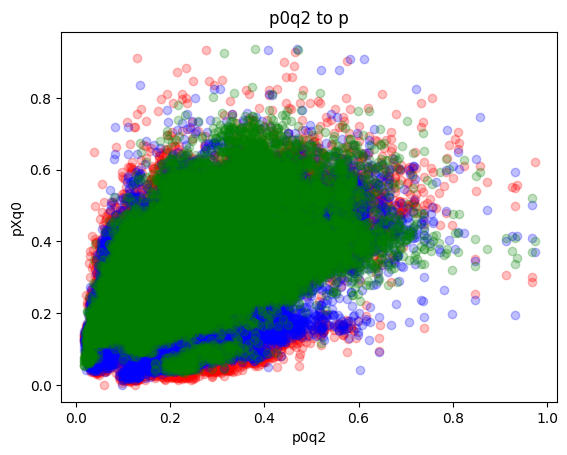

In [19]:
pyplot.scatter(dataset["p0q2"], dataset["p1q0"], c="r", alpha=0.25)
pyplot.scatter(dataset["p0q2"], dataset["p2q0"], c="b", alpha=0.25)
pyplot.scatter(dataset["p0q2"], dataset["p3q0"], c="g", alpha=0.25)
pyplot.xlabel('p0q2') 
pyplot.ylabel('pXq0') 
pyplot.title("p0q2 to p")

Text(0.5, 1.0, 'p0q3 to p')

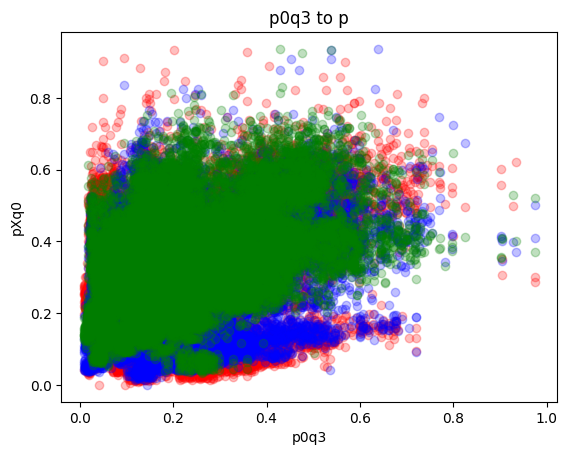

In [20]:
pyplot.scatter(dataset["p0q3"], dataset["p1q0"], c="r", alpha=0.25)
pyplot.scatter(dataset["p0q3"], dataset["p2q0"], c="b", alpha=0.25)
pyplot.scatter(dataset["p0q3"], dataset["p3q0"], c="g", alpha=0.25)
pyplot.xlabel('p0q3') 
pyplot.ylabel('pXq0')
pyplot.title("p0q3 to p")

### Relation Between pXq0 and p0qY

Text(0.5, 1.0, 'p1q0 to q')

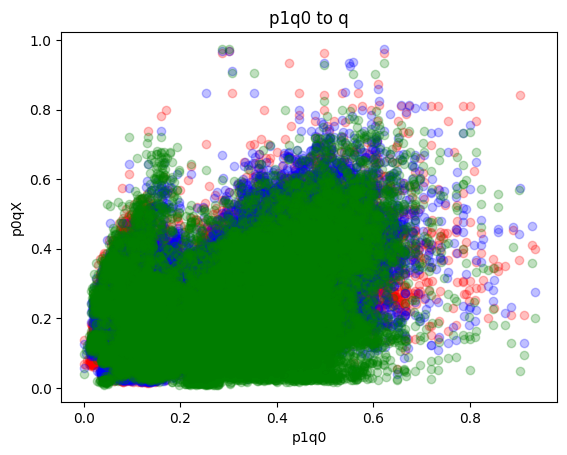

In [21]:
pyplot.scatter(dataset["p1q0"], dataset["p0q1"], c="r", alpha=0.25)
pyplot.scatter(dataset["p1q0"], dataset["p0q2"], c="b", alpha=0.25)
pyplot.scatter(dataset["p1q0"], dataset["p0q3"], c="g", alpha=0.25)
pyplot.xlabel('p1q0') 
pyplot.ylabel('p0qX')
pyplot.title("p1q0 to q")

Text(0.5, 1.0, 'p2q0 to q')

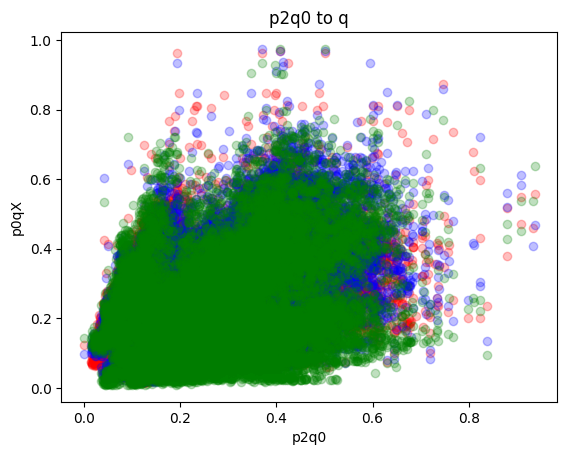

In [22]:
pyplot.scatter(dataset["p2q0"], dataset["p0q1"], c="r", alpha=0.25)
pyplot.scatter(dataset["p2q0"], dataset["p0q2"], c="b", alpha=0.25)
pyplot.scatter(dataset["p2q0"], dataset["p0q3"], c="g", alpha=0.25)
pyplot.xlabel('p2q0') 
pyplot.ylabel('p0qX')
pyplot.title("p2q0 to q")

Text(0.5, 1.0, 'p3q0 to q')

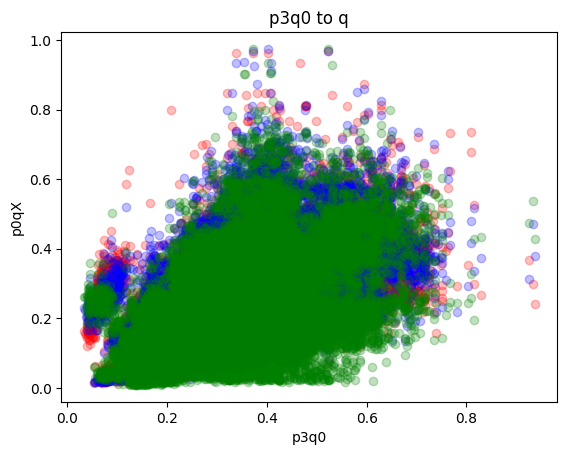

In [23]:
pyplot.scatter(dataset["p3q0"], dataset["p0q1"], c="r", alpha=0.25)
pyplot.scatter(dataset["p3q0"], dataset["p0q2"], c="b", alpha=0.25)
pyplot.scatter(dataset["p3q0"], dataset["p0q3"], c="g", alpha=0.25)
pyplot.xlabel('p3q0') 
pyplot.ylabel('p0qX')
pyplot.title("p3q0 to q")

### p0q0 Compared to Non p / q Variables

Text(0, 0.5, 'Hour')

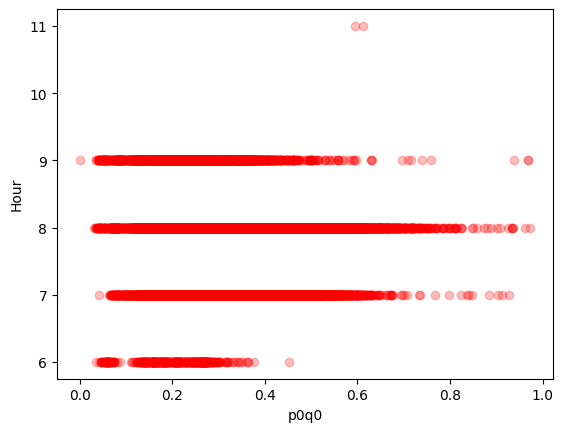

In [24]:
pyplot.scatter(dataset["p0q0"], dataset["intHour"], c="r", alpha=0.25)
pyplot.xlabel('p0q0') 
pyplot.ylabel('Hour')

Text(0, 0.5, 'Weekday')

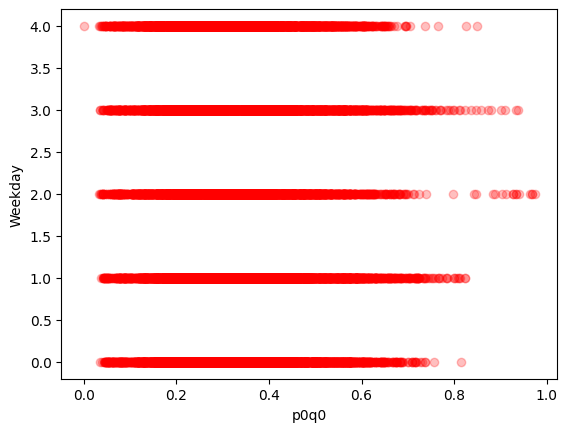

In [25]:
pyplot.scatter(dataset["p0q0"], dataset["weekday"], c="r", alpha=0.25)
pyplot.xlabel('p0q0') 
pyplot.ylabel('Weekday')

Text(0, 0.5, 'Station')

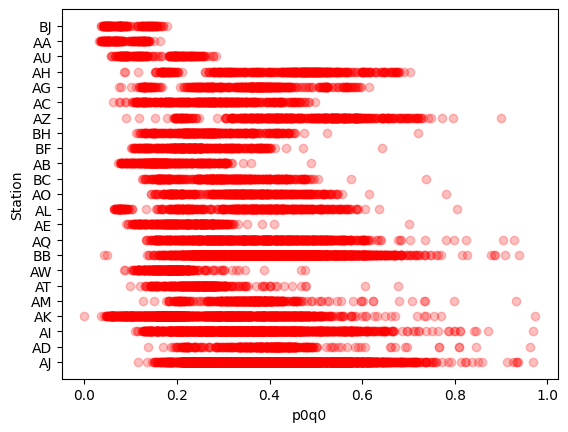

In [26]:
pyplot.scatter(dataset["p0q0"], dataset["station"], c="r", alpha=0.25)
pyplot.xlabel('p0q0') 
pyplot.ylabel('Station')

Text(0, 0.5, 'Month')

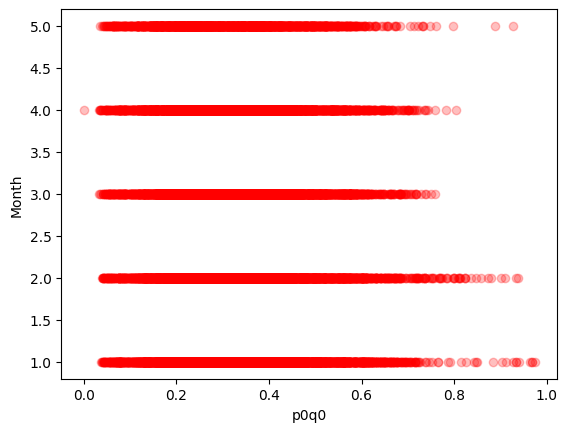

In [27]:
pyplot.scatter(dataset["p0q0"], dataset["month"], c="r", alpha=0.25)
pyplot.xlabel('p0q0') 
pyplot.ylabel('Month')

Text(0, 0.5, 'Train')

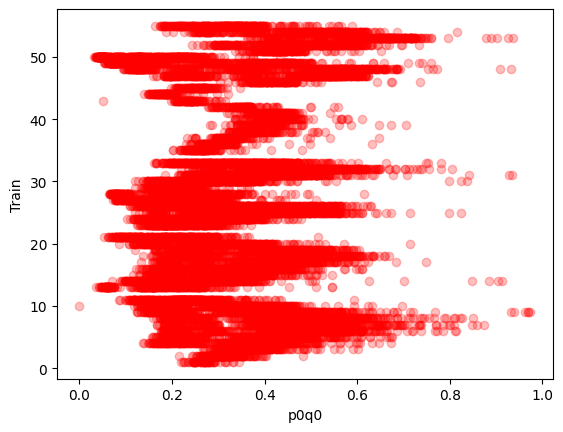

In [28]:
pyplot.scatter(dataset["p0q0"], dataset["train"], c="r", alpha=0.25)
pyplot.xlabel('p0q0') 
pyplot.ylabel('Train')

Text(0, 0.5, 'Way')

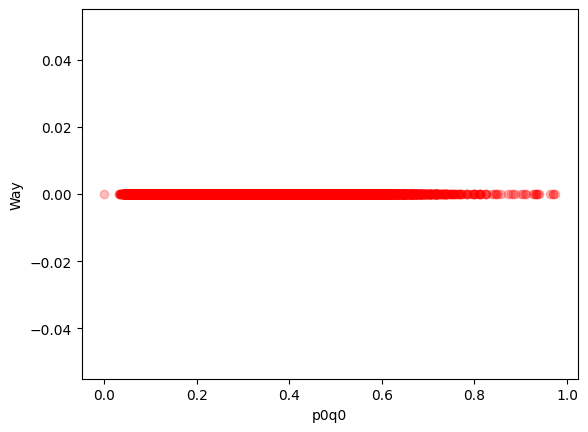

In [29]:
pyplot.scatter(dataset["p0q0"], dataset["way"], c="r", alpha=0.25)
pyplot.xlabel('p0q0') 
pyplot.ylabel('Way')

### Other Correlations

Text(0, 0.5, 'Hour')

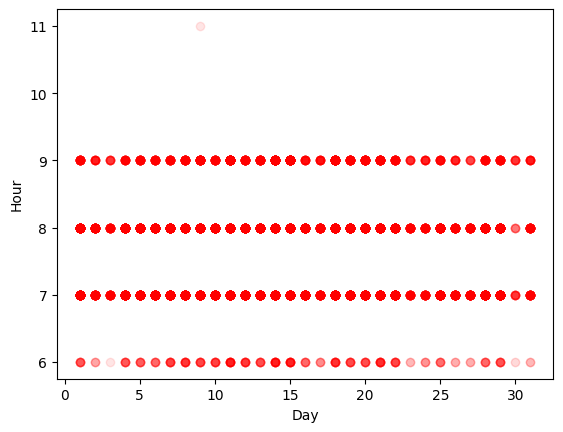

In [30]:
pyplot.scatter(dataset["day"], dataset["intHour"], c="r", alpha=0.05)
pyplot.xlabel('Day') 
pyplot.ylabel('Hour')

<AxesSubplot: xlabel='day', ylabel='intHour'>

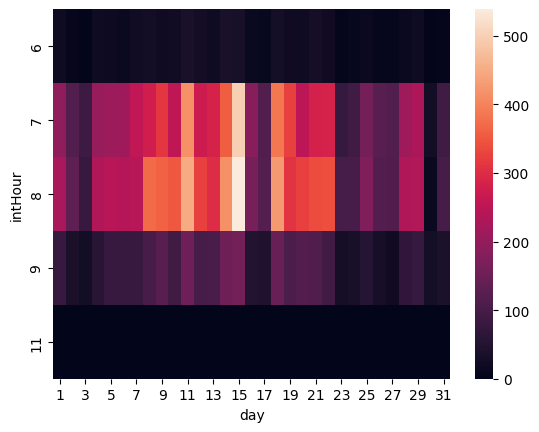

In [31]:
seaborn.heatmap(dataset.groupby(['intHour','day']).size().unstack(fill_value=0))

Text(0, 0.5, 'Hour')

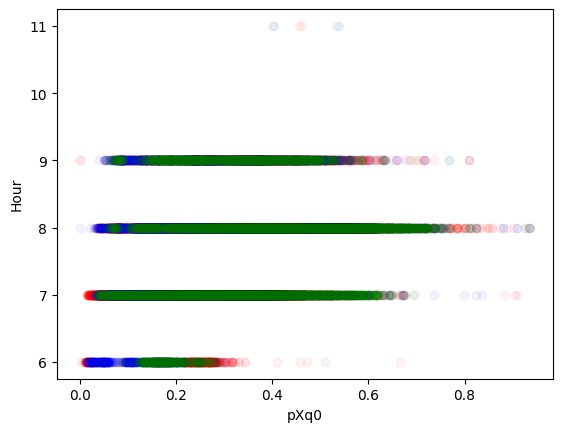

In [32]:
pyplot.scatter(dataset["p1q0"], dataset["intHour"], c="r", alpha=0.05)
pyplot.scatter(dataset["p2q0"], dataset["intHour"], c="b", alpha=0.05)
pyplot.scatter(dataset["p3q0"], dataset["intHour"], c="g", alpha=0.05)
pyplot.xlabel('pXq0') 
pyplot.ylabel('Hour')

Text(0, 0.5, 'Hour')

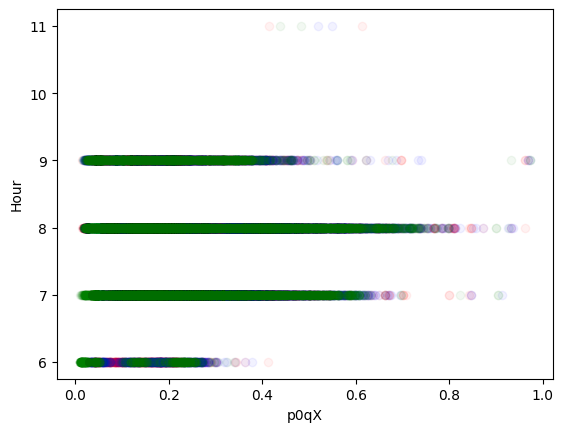

In [33]:
pyplot.scatter(dataset["p0q1"], dataset["intHour"], c="r", alpha=0.05)
pyplot.scatter(dataset["p0q2"], dataset["intHour"], c="b", alpha=0.05)
pyplot.scatter(dataset["p0q3"], dataset["intHour"], c="g", alpha=0.05)
pyplot.xlabel('p0qX') 
pyplot.ylabel('Hour')

Text(0, 0.5, 'Line')

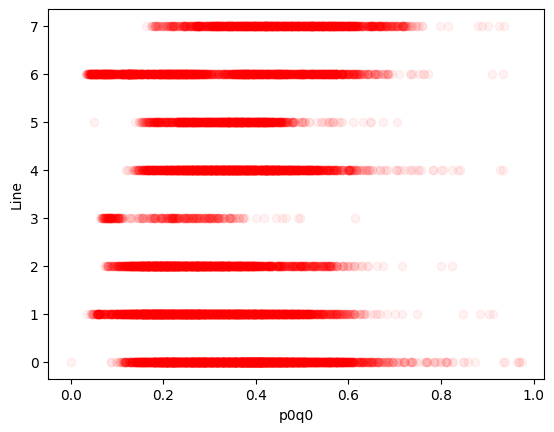

In [34]:
pyplot.scatter(dataset["p0q0"], dataset["line"], c="r", alpha=0.05)
pyplot.xlabel('p0q0') 
pyplot.ylabel('Line')

Text(0, 0.5, 'Line')

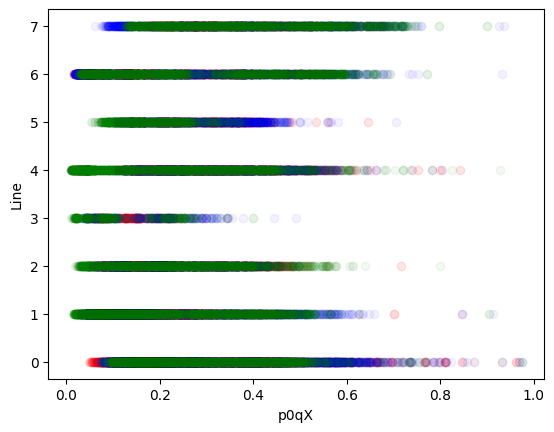

In [35]:
pyplot.scatter(dataset["p0q1"], dataset["line"], c="r", alpha=0.05)
pyplot.scatter(dataset["p0q2"], dataset["line"], c="b", alpha=0.05)
pyplot.scatter(dataset["p0q3"], dataset["line"], c="g", alpha=0.05)
pyplot.xlabel('p0qX') 
pyplot.ylabel('Line')

Text(0, 0.5, 'Line')

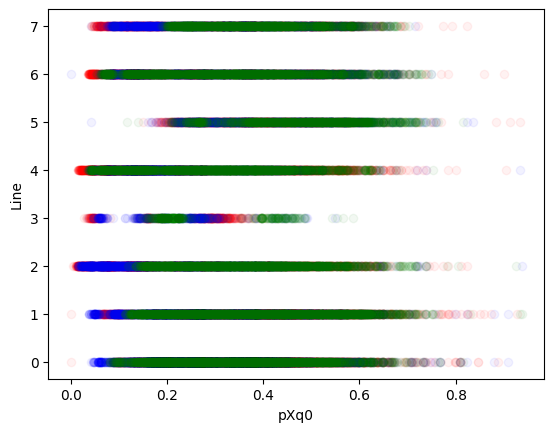

In [36]:
pyplot.scatter(dataset["p1q0"], dataset["line"], c="r", alpha=0.05)
pyplot.scatter(dataset["p2q0"], dataset["line"], c="b", alpha=0.05)
pyplot.scatter(dataset["p3q0"], dataset["line"], c="g", alpha=0.05)
pyplot.xlabel('pXq0') 
pyplot.ylabel('Line')

Text(0, 0.5, 'Train')

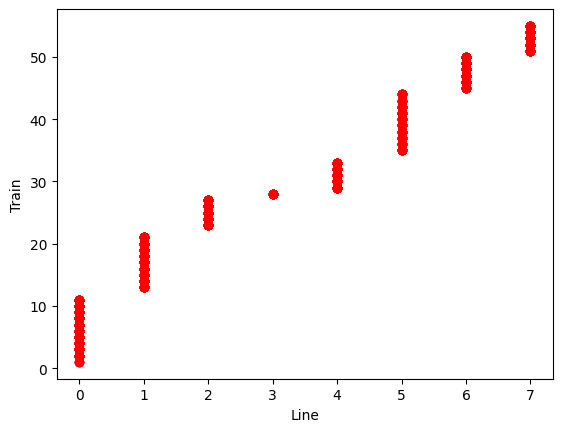

In [37]:
pyplot.scatter(dataset["line"], dataset["train"], c="r", alpha=0.05)
pyplot.xlabel('Line') 
pyplot.ylabel('Train')